In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [4]:
pd.options.display.max_rows = 300

In [5]:
pd.options.display.max_columns = 200

In [6]:
# Read in CSV files
covid = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/COVID County Data/covid_county_data_cleaned2.csv')
social = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/SVI2018_US_COUNTY_2.csv')

In [7]:
covid.dtypes

Unnamed: 0          int64
name               object
date               object
fips                int64
lat               float64
long              float64
confirmed           int64
deaths              int64
confirmed_diff      int64
deaths_diff         int64
last_update        object
state              object
state_abbr         object
dtype: object

In [8]:
covid.head()

,Unnamed: 0,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,last_update,state,state_abbr
0,161205,Abbeville,5/17/20,45001,34.223334,-82.461707,35,0,1,0,5/18/20 2:32,South Carolina,SC
1,160071,Acadia,5/17/20,22001,30.295065,-92.414197,198,12,6,1,5/18/20 2:32,Louisiana,LA
2,161656,Accomack,5/17/20,51001,37.767072,-75.632346,688,9,20,0,5/18/20 2:32,Virginia,VT
3,159538,Ada,5/17/20,16001,43.452658,-116.241552,773,22,0,0,5/18/20 2:32,Idaho,ID
4,159770,Adair,5/17/20,19001,41.330756,-94.471059,5,0,1,0,5/18/20 2:32,Iowa,IA


In [9]:
fips_grouped = covid.groupby('fips')[['confirmed', 'deaths', 'confirmed_diff', 'deaths_diff']].sum()
print(fips_grouped)

       confirmed  deaths  confirmed_diff  deaths_diff
fips                                                 
1001         110       4               0            0
1003         254       8               0            0
1005          81       1               2            0
1007          50       1               0            0
1009          46       1               1            1
...          ...     ...             ...          ...
56037         23       0               0            0
56039        100       0               0            0
56041         10       0               0            0
56043         16       0               7            0
90049        219       3              10            0

[2914 rows x 4 columns]


In [10]:
flat_fips = fips_grouped.reset_index()
print(flat_fips)

       fips  confirmed  deaths  confirmed_diff  deaths_diff
0      1001        110       4               0            0
1      1003        254       8               0            0
2      1005         81       1               2            0
3      1007         50       1               0            0
4      1009         46       1               1            1
...     ...        ...     ...             ...          ...
2909  56037         23       0               0            0
2910  56039        100       0               0            0
2911  56041         10       0               0            0
2912  56043         16       0               7            0
2913  90049        219       3              10            0

[2914 rows x 5 columns]


In [11]:
flat_fips.head()

,fips,confirmed,deaths,confirmed_diff,deaths_diff
0,1001,110,4,0,0
1,1003,254,8,0,0
2,1005,81,1,2,0
3,1007,50,1,0,0
4,1009,46,1,1,1


In [12]:
flat_fips.dtypes

fips              int64
confirmed         int64
deaths            int64
confirmed_diff    int64
deaths_diff       int64
dtype: object

In [13]:
# Instead of dropping 50 composite and margin or error variables from the SVI using code, I just deleted them from the csv file (I know, I know)
social.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
0,35,NEW MEXICO,Rio Arriba,35039,5860.869195,39307,20044,12398,-999,-999,-999,3669,7083,9318,6280,1330,34397,755,67,7770,264,763,654
1,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
2,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543
3,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322
4,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112


In [14]:
social.dtypes

ST             int64
STATE         object
COUNTY        object
fips           int64
AREA_SQMI    float64
E_TOTPOP       int64
E_HU           int64
E_HH           int64
E_POV          int64
E_UNEMP        int64
E_PCI          int64
E_NOHSDP       int64
E_AGE65        int64
E_AGE17        int64
E_DISABL       int64
E_SNGPNT       int64
E_MINRTY       int64
E_LIMENG       int64
E_MUNIT        int64
E_MOBILE       int64
E_CROWD        int64
E_NOVEH        int64
E_GROUPQ       int64
dtype: object

In [15]:
# For the SVI, -999 reflects missing values. Apparantly, only one county has -999 vaules in their dataset, so removing.
social =  social[(social.iloc[:, 1:] != -999).all(axis=1)]
social.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
1,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
2,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543
3,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322
4,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112
5,1,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512


In [16]:
# Merge social and covid on fips
merged = pd.merge(social, flat_fips, on='fips')
merged.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,1,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [17]:
merged.dtypes

ST                  int64
STATE              object
COUNTY             object
fips                int64
AREA_SQMI         float64
E_TOTPOP            int64
E_HU                int64
E_HH                int64
E_POV               int64
E_UNEMP             int64
E_PCI               int64
E_NOHSDP            int64
E_AGE65             int64
E_AGE17             int64
E_DISABL            int64
E_SNGPNT            int64
E_MINRTY            int64
E_LIMENG            int64
E_MUNIT             int64
E_MOBILE            int64
E_CROWD             int64
E_NOVEH             int64
E_GROUPQ            int64
confirmed           int64
deaths              int64
confirmed_diff      int64
deaths_diff         int64
dtype: object

In [18]:
merged.shape

(2912, 27)

In [19]:
# I clearly don't know how to drop multiple culumns
merged.drop('ST', axis=1, inplace=True)
merged.head()

,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [20]:
merged.drop('STATE', axis=1, inplace=True)
merged.head()

,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [21]:
merged.drop('COUNTY', axis=1, inplace=True)
merged.head()

,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [22]:
merged.drop('fips', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths,confirmed_diff,deaths_diff
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,4,0,0
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1,1
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,9,1,0
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,3,0,0
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,22,0,0


In [23]:
merged.drop('deaths', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,confirmed_diff,deaths_diff
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,0,0
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1,1
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,1,0
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,0,0
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,0,0


In [24]:
merged.drop('confirmed_diff', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed,deaths_diff
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110,0
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46,1
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272,0
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130,0
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328,0


In [25]:
merged.drop('deaths_diff', axis=1, inplace=True)
merged.head()

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,confirmed
0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,110
1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,46
2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,272
3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,130
4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512,328


In [26]:
# Assign X (predictors) and Y (criterion)
X = merged.drop("confirmed", axis=1)
Y = merged["confirmed"].values.reshape(-1, 1)
print(X.shape, Y.shape)

(2912, 19) (2912, 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Not able to get SGD to work
from keras.optimizers import SGD

Using TensorFlow backend.


In [28]:
# Create an empty sequential model
model = Sequential()

In [49]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
X_test.shape

(728, 19)

In [51]:
Y_test.shape

(728, 1)

In [86]:
# Model 1 - MSLE
# define model
model = Sequential()
model.add(Dense(6, input_dim=19, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 6)                 120       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 21        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [88]:
# model.add(Dense(units=100, activation='relu', input_dim=19))
# model.add(Dense(units=100, activation='relu'))
# model.add(Dense(1, activation='linear'))

In [89]:
model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    Y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 2184 samples
Epoch 1/60
2184/2184 - 1s - loss: 17.3255 - accuracy: 0.9712
Epoch 2/60
2184/2184 - 0s - loss: 16.2088 - accuracy: 0.9991
Epoch 3/60
2184/2184 - 0s - loss: 14.8632 - accuracy: 0.9995
Epoch 4/60
2184/2184 - 0s - loss: 13.5496 - accuracy: 0.9995
Epoch 5/60
2184/2184 - 0s - loss: 12.4556 - accuracy: 0.9995
Epoch 6/60
2184/2184 - 0s - loss: 11.5387 - accuracy: 0.9995
Epoch 7/60
2184/2184 - 0s - loss: 10.7637 - accuracy: 0.9995
Epoch 8/60
2184/2184 - 0s - loss: 10.0978 - accuracy: 0.9995
Epoch 9/60
2184/2184 - 0s - loss: 9.5206 - accuracy: 1.0000
Epoch 10/60
2184/2184 - 0s - loss: 9.0165 - accuracy: 1.0000
Epoch 11/60
2184/2184 - 0s - loss: 8.5744 - accuracy: 1.0000
Epoch 12/60
2184/2184 - 0s - loss: 8.1820 - accuracy: 1.0000
Epoch 13/60
2184/2184 - 0s - loss: 7.8320 - accuracy: 1.0000
Epoch 14/60
2184/2184 - 0s - loss: 7.5184 - accuracy: 1.0000
Epoch 15/60
2184/2184 - 0s - loss: 7.2338 - accuracy: 1.0000
Epoch 16/60
2184/2184 - 0s - loss: 6.9748 - accuracy: 1.0000
Epo

In [90]:
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=60, verbose=0)

In [91]:
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, Y_train, verbose=0)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 3.1072163616781268, Accuracy: 0.9995421171188354


In [92]:
model.save("covid_model_trained.h5")

In [93]:
from tensorflow.keras.models import load_model
covid_model = load_model("covid_model_trained.h5")

In [94]:
model_loss, model_accuracy = covid_model.evaluate(
    X_test_scaled, Y_test, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 3.0418189672323375, Accuracy: 1.0


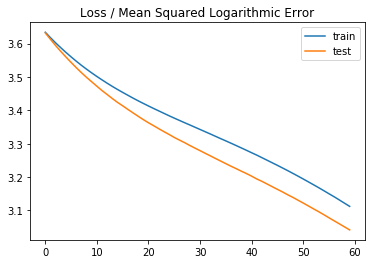

In [95]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [105]:
# Model 2
# define model
model = Sequential()
model.add(Dense(12, input_dim=19, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dense(3, activation='linear'))

In [106]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 12)                240       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 21        
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    Y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 2184 samples
Epoch 1/60
2184/2184 - 1s - loss: 16.2687 - accuracy: 0.9973
Epoch 2/60
2184/2184 - 0s - loss: 14.4987 - accuracy: 1.0000
Epoch 3/60
2184/2184 - 0s - loss: 12.9810 - accuracy: 1.0000
Epoch 4/60
2184/2184 - 0s - loss: 11.6592 - accuracy: 1.0000
Epoch 5/60
2184/2184 - 0s - loss: 10.7120 - accuracy: 1.0000
Epoch 6/60
2184/2184 - 0s - loss: 10.0523 - accuracy: 1.0000
Epoch 7/60
2184/2184 - 0s - loss: 9.5796 - accuracy: 1.0000
Epoch 8/60
2184/2184 - 0s - loss: 9.2333 - accuracy: 1.0000
Epoch 9/60
2184/2184 - 0s - loss: 8.9756 - accuracy: 1.0000
Epoch 10/60
2184/2184 - 0s - loss: 8.7855 - accuracy: 1.0000
Epoch 11/60
2184/2184 - 0s - loss: 8.6412 - accuracy: 1.0000
Epoch 12/60
2184/2184 - 0s - loss: 8.5313 - accuracy: 1.0000
Epoch 13/60
2184/2184 - 0s - loss: 8.4483 - accuracy: 1.0000
Epoch 14/60
2184/2184 - 0s - loss: 8.3844 - accuracy: 1.0000
Epoch 15/60
2184/2184 - 0s - loss: 8.3347 - accuracy: 1.0000
Epoch 16/60
2184/2184 - 0s - loss: 8.2959 - accuracy: 1.0000
Epoch

In [108]:
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=60, verbose=0)

In [109]:
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, Y_train, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 6.788156326000507, Accuracy: 0.610805869102478


In [110]:
model.save("covid_model_trained.h5")

In [111]:
from tensorflow.keras.models import load_model
covid_model = load_model("covid_model_trained.h5")

In [112]:
model_loss, model_accuracy = covid_model.evaluate(
    X_test_scaled, Y_test, verbose=0)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network - Loss: 6.991780328226613, Accuracy: 0.6043956279754639


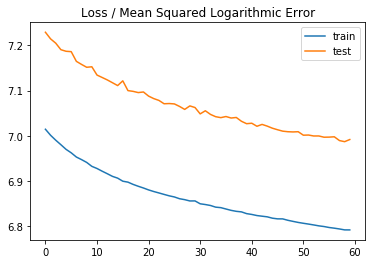

In [113]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()